Import Libraries

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OrdinalEncoder,StandardScaler
from sklearn.metrics import accuracy_score , f1_score , confusion_matrix

Load and Explore Dataset

In [2]:
loan_df = pd.read_csv('loan_approval_dataset.csv')

In [3]:
loan_df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [4]:
# ===========================================
#  Loan Approval Dataset - Column Description
# ===========================================

# loan_id: Unique identifier for each loan application.
# no_of_dependents: Number of people financially dependent on the applicant (e.g., children, spouse, parents).
# education: Education level of the applicant ('Graduate' or 'Not Graduate').
# self_employed: Indicates whether the applicant is self-employed ('Yes' or 'No').
# income_annum: Annual income of the applicant (in local currency).
# loan_amount: Total amount of loan requested by the applicant.
# loan_term: Duration of the loan (in years or months, depending on dataset definition).
# cibil_score: Credit score of the applicant (ranges from 300 to 900; higher = better credit history).
# residential_assets_value: Value of applicant’s residential properties (e.g., houses, apartments).
# commercial_assets_value: Value of applicant’s commercial properties (e.g., shops, offices).
# luxury_assets_value: Value of applicant’s luxury assets (e.g., cars, jewelry, yachts).
# bank_asset_value: Value of applicant’s bank-related assets (e.g., savings, fixed deposits, investments).


# loan_status: Final decision on the loan application ('Approved' or 'Rejected'). -> Target value


In [5]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [6]:
loan_df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [7]:
# check nulls
loan_df.isna().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [8]:
# check duplicates
print(f'Duplicates in dataset = {loan_df.duplicated().sum()}')

Duplicates in dataset = 0


Exploratory Data Analysis (EDA)

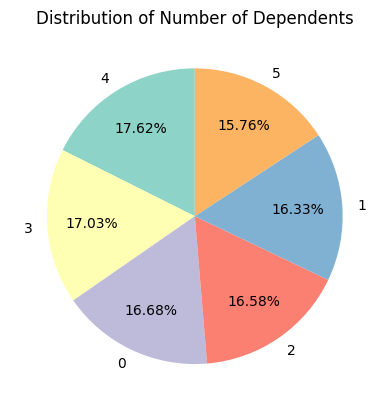

In [9]:
count_per_dep = loan_df[' no_of_dependents'].value_counts()

plt.pie(x=count_per_dep.values , labels= count_per_dep.index , autopct='%.2f%%',pctdistance=0.7,startangle=90 ,colors = ['#8dd3c7', '#ffffb3', '#bebada', '#fb8072', '#80b1d3', '#fdb462'])
plt.title('Distribution of Number of Dependents')
plt.show()

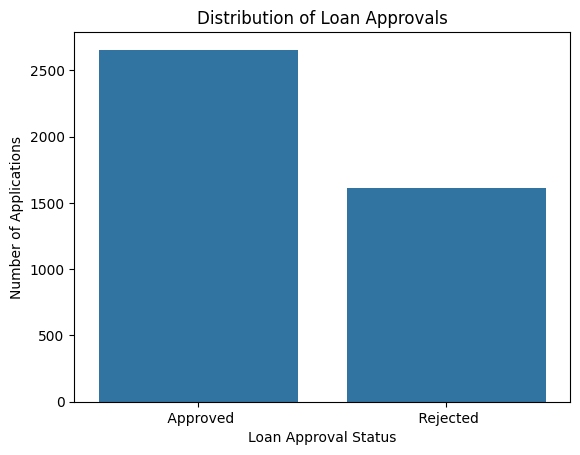

In [10]:
sns.countplot(data =loan_df ,x=' loan_status')          
plt.title('Distribution of Loan Approvals')
plt.xlabel('Loan Approval Status')
plt.ylabel('Number of Applications')
plt.show()

C:\Users\Bassam\AppData\Local\Temp\ipykernel_36676\2841412631.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(data= loan_df , x=' income_annum' , y = ' loan_amount' ,ci=False , marker='o')


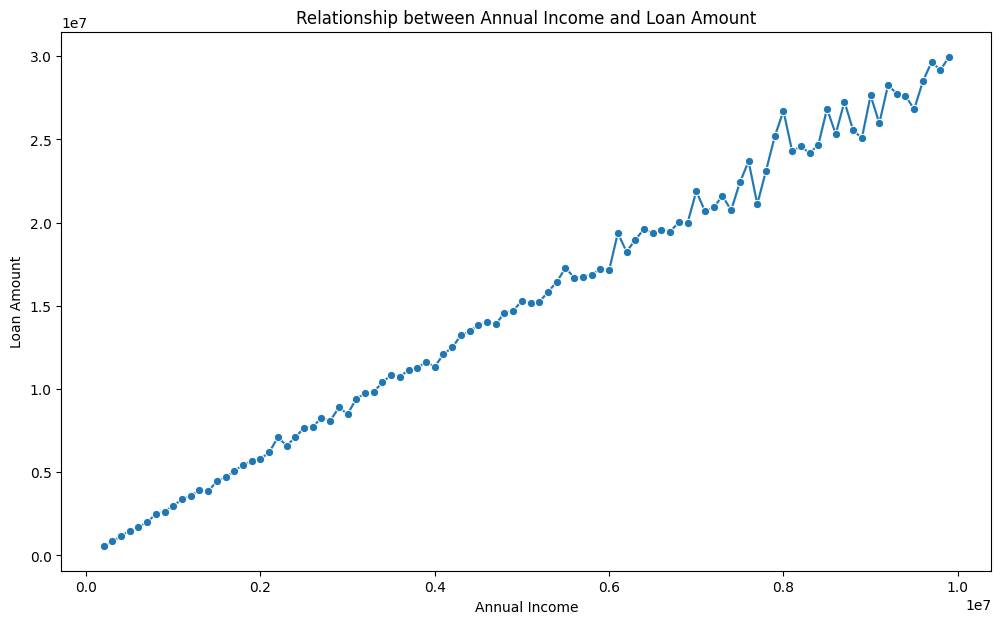

In [11]:
plt.figure(figsize=(12,7))
sns.lineplot(data= loan_df , x=' income_annum' , y = ' loan_amount' ,ci=False , marker='o')
plt.title('Relationship between Annual Income and Loan Amount')
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')
plt.show()

C:\Users\Bassam\AppData\Local\Temp\ipykernel_36676\4165215344.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(data= loan_df , x=' no_of_dependents' , y = ' loan_amount' ,ci=False , marker='o')


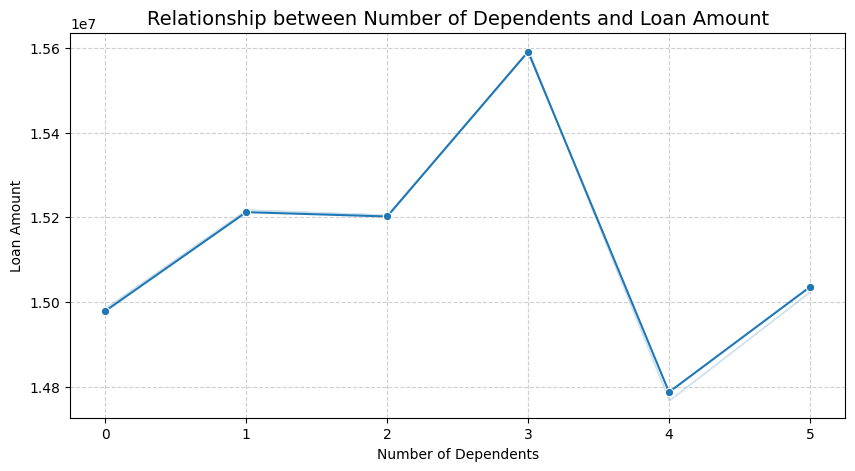

In [12]:
plt.figure(figsize=(10,5))
sns.lineplot(data= loan_df , x=' no_of_dependents' , y = ' loan_amount' ,ci=False , marker='o')
plt.title('Relationship between Number of Dependents and Loan Amount', fontsize=14)
plt.xlabel('Number of Dependents')
plt.ylabel('Loan Amount')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

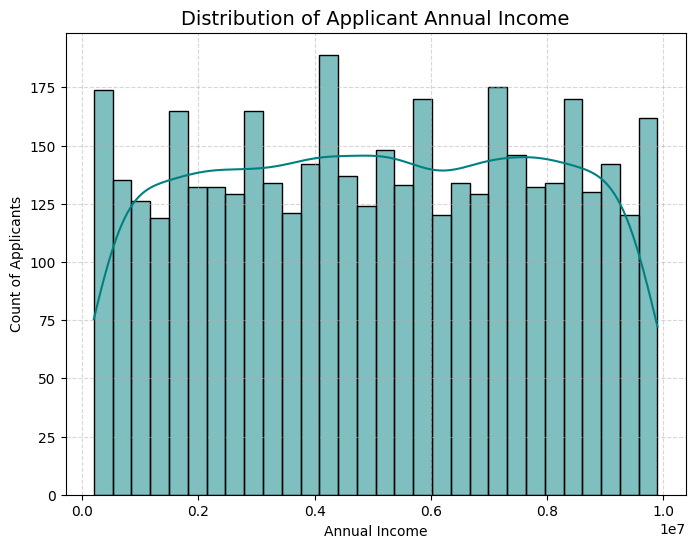

In [13]:
plt.figure(figsize=(8,6))
sns.histplot(data= loan_df , x= ' income_annum' , bins=30 , kde=True, color='teal')
plt.title('Distribution of Applicant Annual Income', fontsize=14)
plt.xlabel('Annual Income')
plt.ylabel('Count of Applicants')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

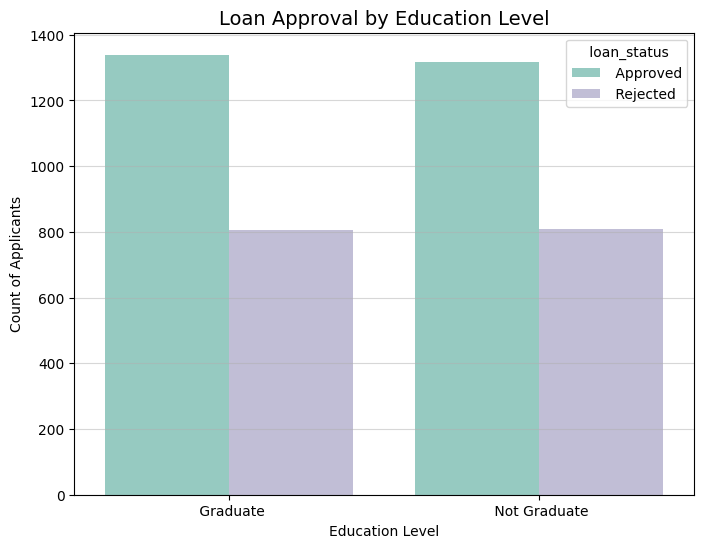

In [14]:
plt.figure(figsize=(8,6))
sns.countplot(data= loan_df , x = ' education' ,hue=' loan_status' , palette = ['#8dd3c7', '#bebada'])
plt.title('Loan Approval by Education Level', fontsize=14)
plt.xlabel('Education Level')
plt.ylabel('Count of Applicants')
plt.grid(axis='y', linestyle='-', alpha=0.5)
plt.show()

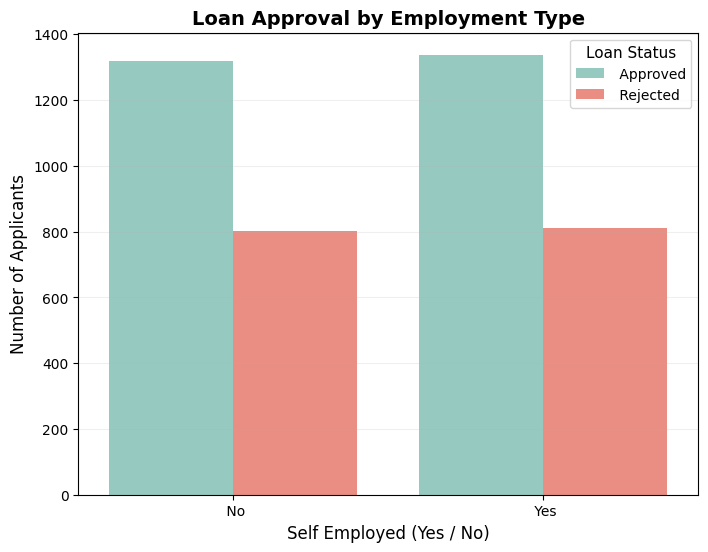

In [15]:
plt.figure(figsize=(8,6))
sns.countplot(data= loan_df , x= ' self_employed' , hue=' loan_status' , palette=['#8dd3c7', '#fb8072'])
plt.title('Loan Approval by Employment Type', fontsize=14, fontweight='bold')
plt.xlabel('Self Employed (Yes / No)', fontsize=12)
plt.ylabel('Number of Applicants', fontsize=12)
plt.grid(axis='y', alpha=0.2, linestyle='-')
plt.legend(title='Loan Status', title_fontsize=11)
plt.show()

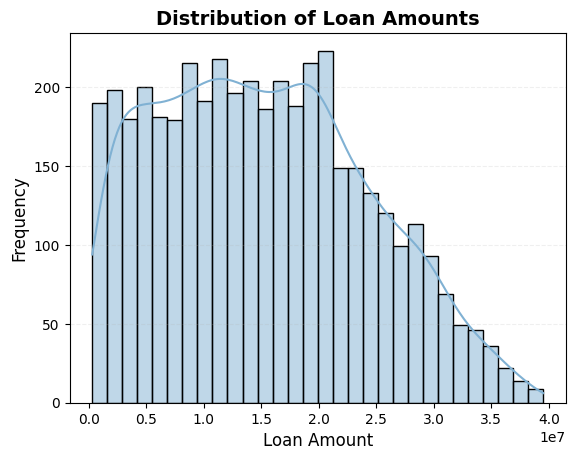

In [16]:
sns.histplot(data= loan_df , x = ' loan_amount' , color='#80b1d3' , kde= True ,bins=30)
plt.title('Distribution of Loan Amounts', fontsize=14, fontweight='bold')
plt.xlabel('Loan Amount', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.2, linestyle='--')
plt.show()

C:\Users\Bassam\AppData\Local\Temp\ipykernel_36676\4250864590.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=loan_df , x=' loan_term' , palette= 'Set2')


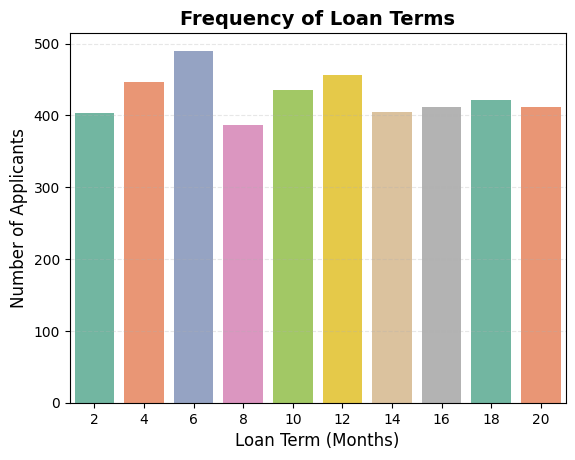

In [17]:
sns.countplot(data=loan_df , x=' loan_term' , palette= 'Set2')
plt.title('Frequency of Loan Terms', fontsize=14, fontweight='bold')
plt.xlabel('Loan Term (Months)', fontsize=12)
plt.ylabel('Number of Applicants', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

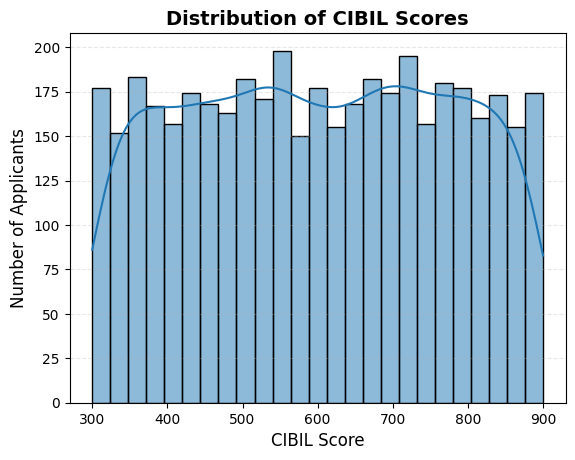

In [18]:
sns.histplot(data= loan_df , x= ' cibil_score' , bins=25 , kde=True)
plt.title('Distribution of CIBIL Scores', fontsize=14, fontweight='bold')
plt.xlabel('CIBIL Score', fontsize=12)
plt.ylabel('Number of Applicants', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

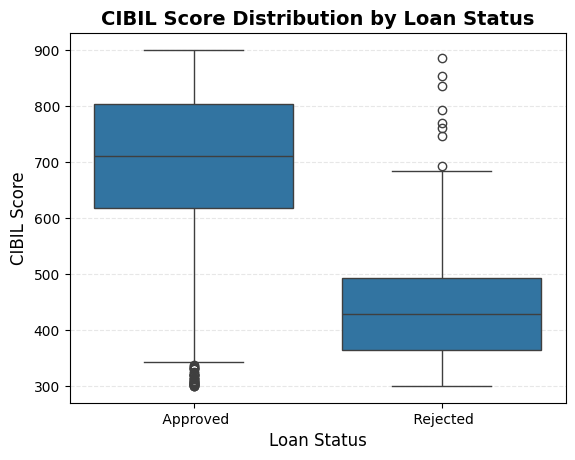

In [19]:
sns.boxplot(data= loan_df , x= ' loan_status' , y = ' cibil_score')
plt.title('CIBIL Score Distribution by Loan Status', fontsize=14, fontweight='bold')
plt.xlabel('Loan Status', fontsize=12)
plt.ylabel('CIBIL Score', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

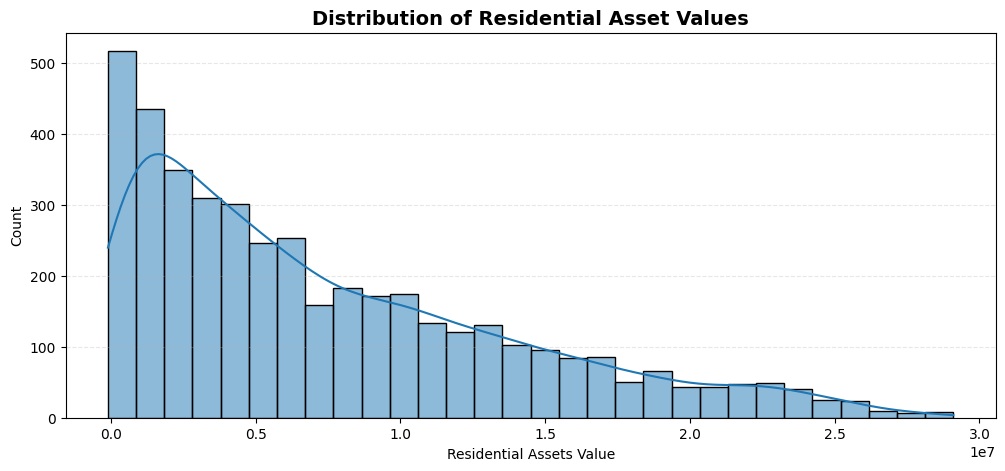

In [20]:
plt.figure(figsize=(12,5))
sns.histplot(data=loan_df , x = ' residential_assets_value' ,bins=30 , kde=True)
plt.title('Distribution of Residential Asset Values', fontsize=14, fontweight='bold')
plt.xlabel('Residential Assets Value')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

C:\Users\Bassam\AppData\Local\Temp\ipykernel_36676\1304350502.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(data= loan_df_sorted , x=' bank_asset_value' , y = ' income_annum' , ci=False , color = '#80b1d3')


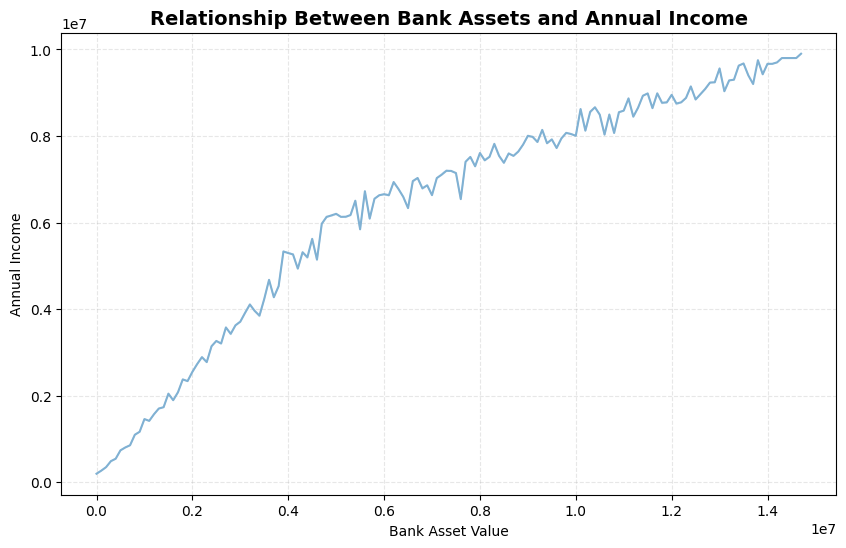

In [21]:
loan_df_sorted = loan_df.sort_values(by=' bank_asset_value')

plt.figure(figsize=(10,6))
sns.lineplot(data= loan_df_sorted , x=' bank_asset_value' , y = ' income_annum' , ci=False , color = '#80b1d3')
plt.title('Relationship Between Bank Assets and Annual Income', fontsize=14, fontweight='bold')
plt.xlabel('Bank Asset Value')
plt.ylabel('Annual Income')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

C:\Users\Bassam\AppData\Local\Temp\ipykernel_36676\58832620.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(data= loan_df_sorted , x=' income_annum' , y = ' luxury_assets_value' , ci=False , color = 'darkblue')


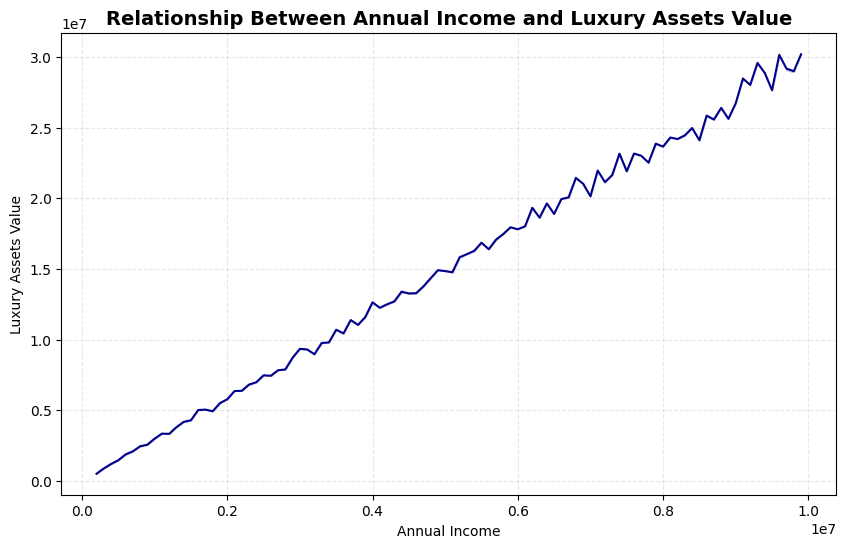

In [22]:
loan_df_sorted = loan_df.sort_values(by=' luxury_assets_value')

plt.figure(figsize=(10,6))
sns.lineplot(data= loan_df_sorted , x=' income_annum' , y = ' luxury_assets_value' , ci=False , color = 'darkblue')
plt.title('Relationship Between Annual Income and Luxury Assets Value', fontsize=14, fontweight='bold')
plt.xlabel('Annual Income')
plt.ylabel('Luxury Assets Value')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

C:\Users\Bassam\AppData\Local\Temp\ipykernel_36676\1040588825.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(data= loan_df , x=' income_annum' , y = ' commercial_assets_value' , ci=False , color = '#ff7f0e')


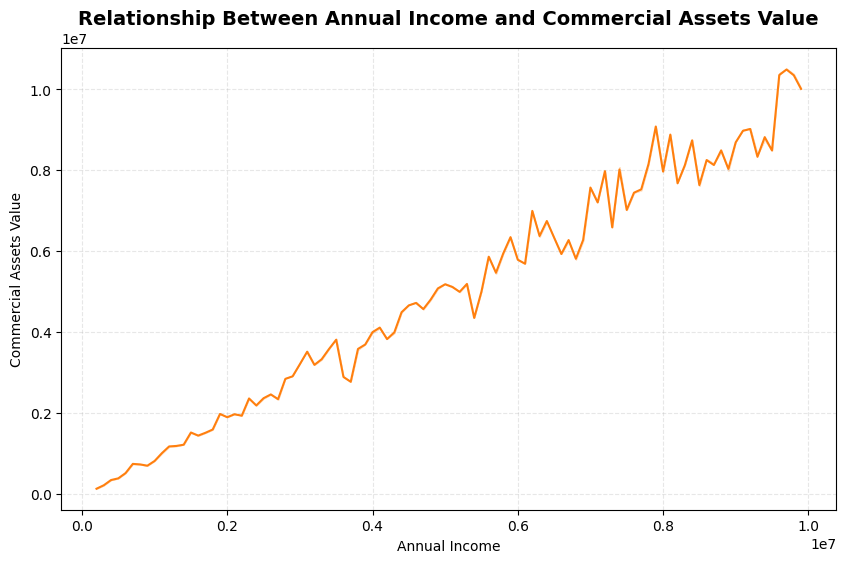

In [23]:
plt.figure(figsize=(10,6))
sns.lineplot(data= loan_df , x=' income_annum' , y = ' commercial_assets_value' , ci=False , color = '#ff7f0e')
plt.title('Relationship Between Annual Income and Commercial Assets Value', fontsize=14, fontweight='bold')
plt.xlabel('Annual Income')
plt.ylabel('Commercial Assets Value')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

In [24]:
# Select all columns in the DataFrame that have a numeric data type (int, float, etc.)
num_cols = loan_df.select_dtypes(include='number').columns
num_cols

Index(['loan_id', ' no_of_dependents', ' income_annum', ' loan_amount',
       ' loan_term', ' cibil_score', ' residential_assets_value',
       ' commercial_assets_value', ' luxury_assets_value',
       ' bank_asset_value'],
      dtype='object')

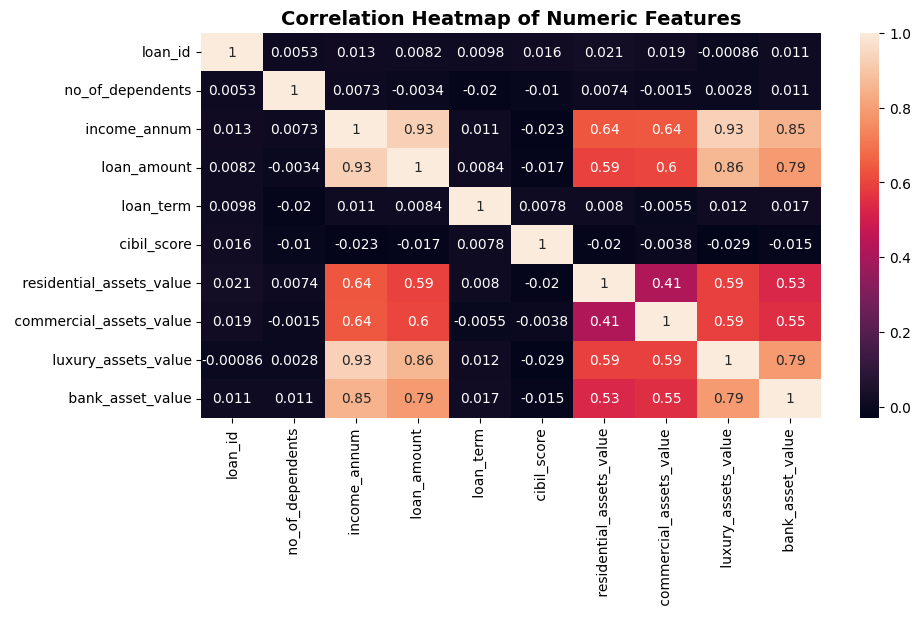

In [25]:
plt.figure(figsize=(10,5))
sns.heatmap(data=loan_df[num_cols].corr(), annot=True)
plt.title('Correlation Heatmap of Numeric Features', fontsize=14, fontweight='bold')
plt.show()

C:\Users\Bassam\AppData\Local\Temp\ipykernel_36676\3049912273.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(data= loan_df , x=' income_annum' , y= ' loan_amount',ci=False , hue=' loan_status')


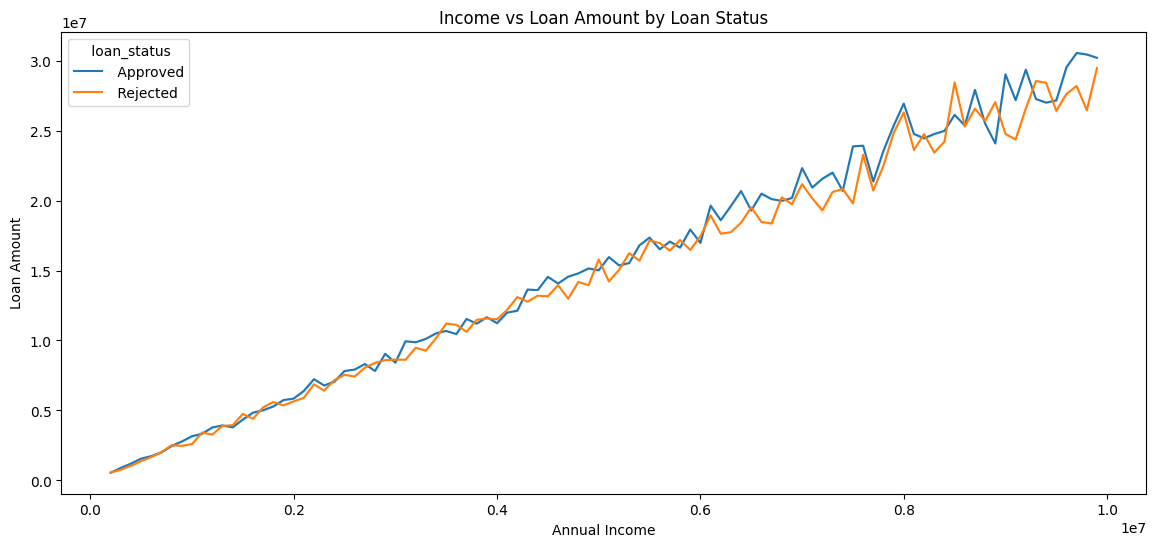

In [26]:
plt.figure(figsize=(14,6))
sns.lineplot(data= loan_df , x=' income_annum' , y= ' loan_amount',ci=False , hue=' loan_status')
plt.title('Income vs Loan Amount by Loan Status')
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')
plt.show()

C:\Users\Bassam\AppData\Local\Temp\ipykernel_36676\3520710329.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(data = loan_df , x=' loan_term' , y = ' loan_amount' ,ci=False)


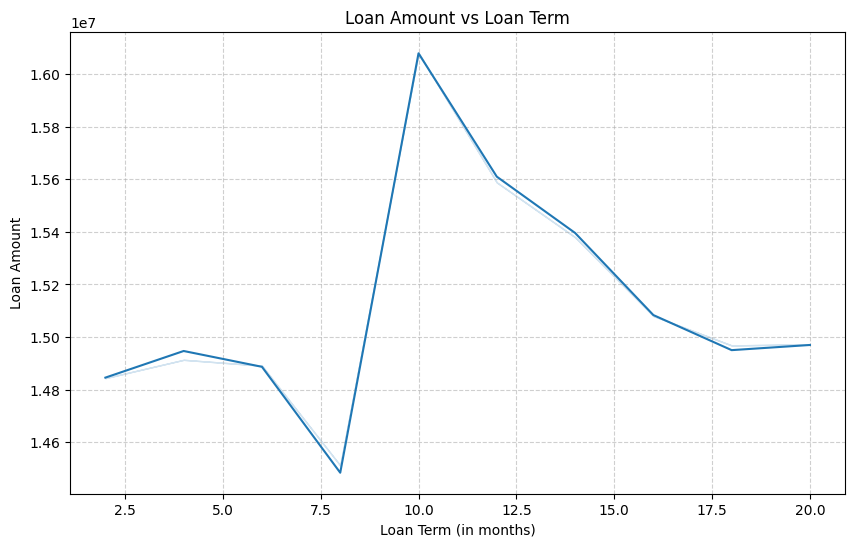

In [27]:
plt.figure(figsize=(10,6))
sns.lineplot(data = loan_df , x=' loan_term' , y = ' loan_amount' ,ci=False)
plt.title('Loan Amount vs Loan Term')
plt.xlabel('Loan Term (in months)')
plt.ylabel('Loan Amount')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

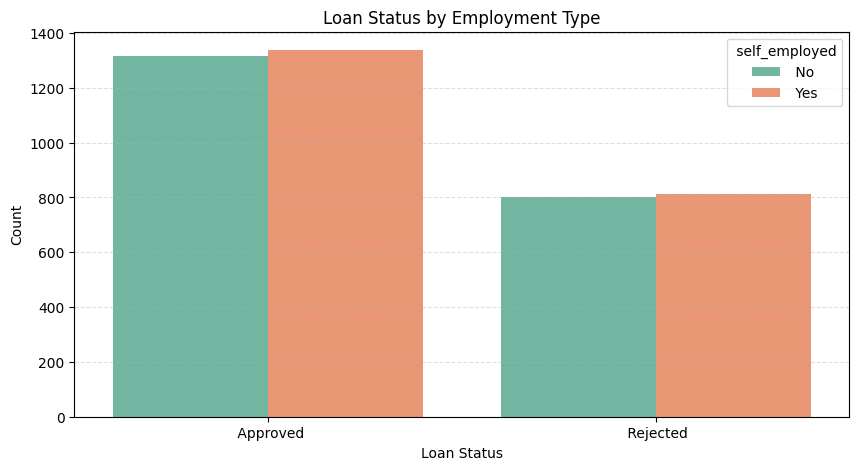

In [28]:
plt.figure(figsize=(10,5))
sns.countplot(data= loan_df , x = ' loan_status' ,hue= ' self_employed' , palette='Set2')
plt.title('Loan Status by Employment Type')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()

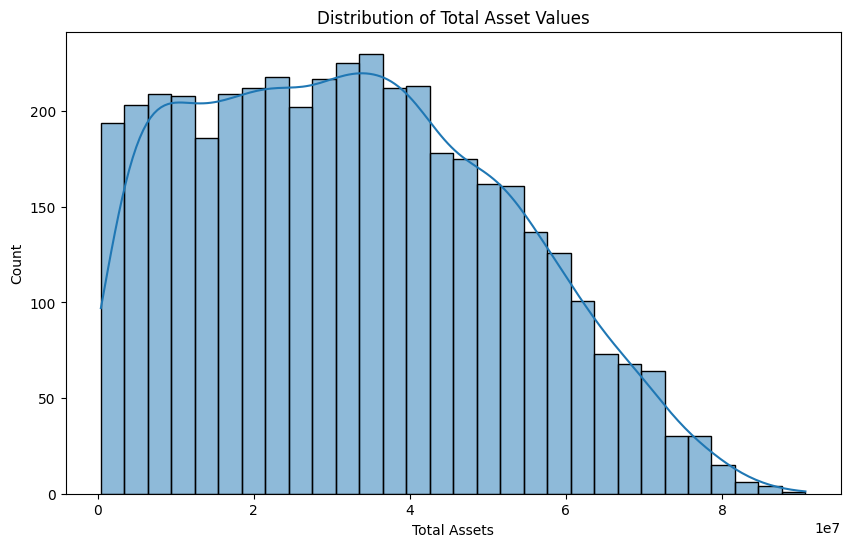

In [29]:
# Distribution of Total Assets
loan_df['total_assets'] = loan_df[[' residential_assets_value' , ' commercial_assets_value' , ' luxury_assets_value' ,' bank_asset_value']].sum(axis=1)

plt.figure(figsize=(10,6))
sns.histplot(data=loan_df , x='total_assets' , bins=30 , kde=True)
plt.title('Distribution of Total Asset Values')
plt.xlabel('Total Assets')
plt.ylabel('Count')
plt.show()

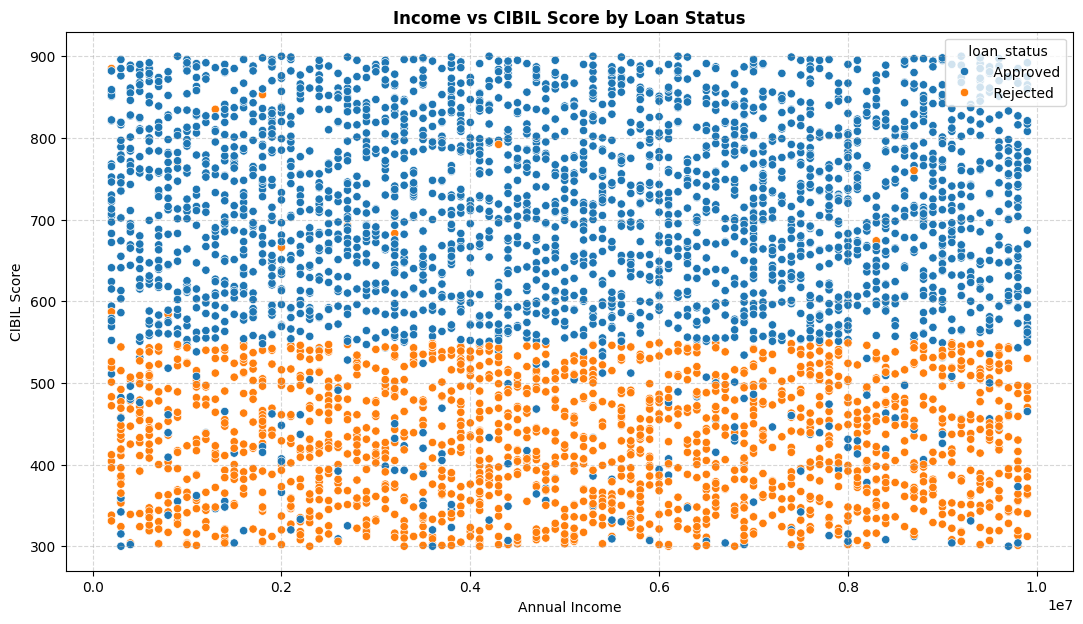

In [30]:
plt.figure(figsize=(13,7))
sns.scatterplot(data=loan_df , x= ' income_annum' , y = ' cibil_score' , hue=' loan_status')
plt.title('Income vs CIBIL Score by Loan Status' ,fontweight = 'bold')
plt.xlabel('Annual Income')
plt.ylabel('CIBIL Score')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

Encode Categorical Columns

In [31]:
encoder = OrdinalEncoder()

In [32]:
catg_cols = [' education' , ' self_employed' , ' loan_status']

In [33]:
encodes_loan_df = loan_df
encodes_loan_df[catg_cols] = encoder.fit_transform(encodes_loan_df[catg_cols])
encodes_loan_df = encodes_loan_df.drop(columns=['total_assets'] , axis=1)
encodes_loan_df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0.0,0.0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0.0
1,2,0,1.0,1.0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1.0
2,3,3,0.0,0.0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1.0
3,4,3,0.0,0.0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1.0
4,5,5,1.0,1.0,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,0.0,1.0,1000000,2300000,12,317,2800000,500000,3300000,800000,1.0
4265,4266,0,1.0,1.0,3300000,11300000,20,559,4200000,2900000,11000000,1900000,0.0
4266,4267,2,1.0,0.0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,1.0
4267,4268,1,1.0,0.0,4100000,12800000,8,780,8200000,700000,14100000,5800000,0.0


Features and Label Split

In [34]:
X = encodes_loan_df.iloc[:,1:-1]
y = encodes_loan_df[[' loan_status']]

Split Data

In [35]:
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42,test_size=0.2)

Scale training data for logistic model

In [37]:
scaler = StandardScaler()

In [47]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

Model Creation

In [39]:
# Create param_grid for LogisticRegression model

lr_param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['saga', 'liblinear'],
    'max_iter': [100, 200, 500],
    'class_weight': [None, 'balanced'],
    'l1_ratio': [0, 0.5, 1]  
}


In [42]:
lr_search = GridSearchCV(LogisticRegression() , lr_param_grid , n_jobs=-1 , cv=5 , scoring='accuracy')

In [43]:
lr_search.fit(X_train_scaled,y_train)

c:\Users\Bassam\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
540 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Bassam\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Bassam\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Bassa

,estimator,LogisticRegression()
,param_grid,"{'C': [0.001, 0.01, ...], 'class_weight': [None, 'balanced'], 'l1_ratio': [0, 0.5, ...], 'max_iter': [100, 200, ...], ...}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l1'


In [63]:
# find best params
lr_search.best_params_

{'C': 0.01,
 'class_weight': 'balanced',
 'l1_ratio': 0,
 'max_iter': 100,
 'penalty': 'l1',
 'solver': 'saga'}

In [45]:
# Create logistic regression model
lr_model = LogisticRegression(C=0.01 , class_weight='balanced' , l1_ratio=0 , max_iter= 100 , random_state= 42 , solver='saga' , penalty= 'l1')

In [46]:
lr_model.fit(X_train_scaled , y_train)

c:\Users\Bassam\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Users\Bassam\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,penalty,'l1'
,dual,False
,tol,0.0001
,C,0.01
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'saga'
,max_iter,100
,multi_class,'deprecated'


In [48]:
# make predictions
lr_pred = lr_model.predict(X_test_scaled)

Evaluate Model

In [ ]:
print(f'Accuracy Score of Logistic model = {accuracy_score(y_test,lr_pred) * 100:.2f}%')

Accuracy Score of Logistic model = 94.03%


In [53]:
print(f'F1 Score of Logistic model = {f1_score(y_test,lr_pred)}')

F1 Score of Logistic model = 0.9246676514032496


In [75]:
labels = ['Rejected', 'Approved']

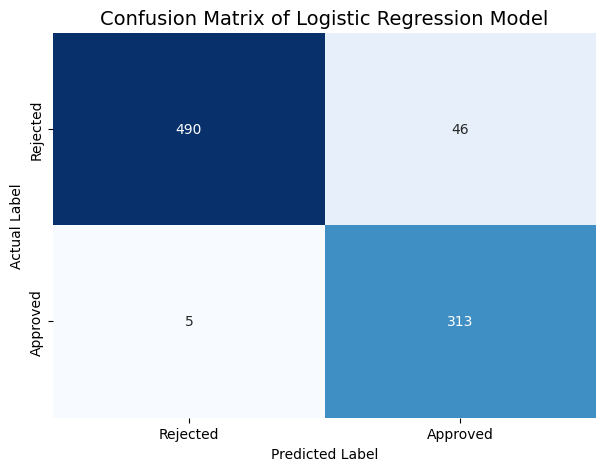

In [76]:
cm = confusion_matrix(y_test,lr_pred)

plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False  , xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix of Logistic Regression Model', fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

Create Decision Tree model

In [59]:
# decision tree param_grid
dt_param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 3, 5, 7, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10],
    'max_features': [None, 'sqrt', 'log2'],
    'class_weight': [None, 'balanced']
}

In [60]:
dt_search = GridSearchCV(DecisionTreeClassifier() , dt_param_grid , n_jobs=-1 , cv=5 , scoring= 'accuracy')

In [62]:
dt_search.fit(X_train,y_train)

,estimator,DecisionTreeClassifier()
,param_grid,"{'class_weight': [None, 'balanced'], 'criterion': ['gini', 'entropy', ...], 'max_depth': [None, 3, ...], 'max_features': [None, 'sqrt', ...], ...}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'log_loss'


In [64]:
# find best params
dt_search.best_params_

{'class_weight': None,
 'criterion': 'log_loss',
 'max_depth': 15,
 'max_features': None,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'splitter': 'best'}

In [66]:
# create a decision tree model
dt_model = DecisionTreeClassifier(class_weight=None , criterion= 'log_loss' , max_depth=15 , max_features= None , min_samples_leaf= 4 , min_samples_split= 10 , splitter= 'best')

In [67]:
dt_model.fit(X_train,y_train)

,criterion,'log_loss'
,splitter,'best'
,max_depth,15
,min_samples_split,10
,min_samples_leaf,4
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [68]:
# make predictions
dt_pred = dt_model.predict(X_test)

Evaluate model

In [70]:
print(f'Accuracy Score of Decision Tree model = {accuracy_score(y_test,dt_pred) * 100:.2f}%')

Accuracy Score of Decision Tree model = 98.01%


In [73]:
print(f'F1 Score of Decision Tree model = {f1_score(y_test,dt_pred)}')

F1 Score of Decision Tree model = 0.9731437598736177


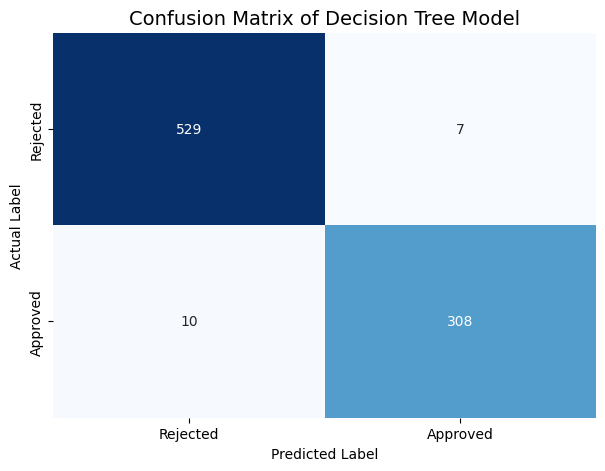

In [80]:
cm = confusion_matrix(y_test,dt_pred)

plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False  , xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix of Decision Tree Model', fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()